In [ ]:
import numpy as np

class TwoLayerNNBinary:
    def __init__(self, input_dim, hidden_dim, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        # Initialize weights
        # W1: (n_features=input_dim, hidden_dim)
        self.W1 = np.random.randn(input_dim, hidden_dim) * 0.01   # (n, h)
        self.b1 = np.zeros((1, hidden_dim))                       # (1, h)
        # W2: (hidden_dim, 1)  -> single output neuron
        self.W2 = np.random.randn(hidden_dim, 1) * 0.01           # (h, 1)
        self.b2 = np.zeros((1, 1))                                # (1, 1)

    def relu(self, z):
        return np.maximum(0, z)   # shape preserved

    def relu_grad(self, z):
        return (z > 0).astype(float)  # same shape as z

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))   # shape preserved

    def compute_loss(self, y, y_hat):
        # y: (m,1), y_hat: (m,1)
        m = y.shape[0]
        eps = 1e-9
        return -np.mean(y*np.log(y_hat+eps) + (1-y)*np.log(1-y_hat+eps))

    def fit(self, X, y):
        # X: (m, n), y: (m, 1)
        y = y.reshape(-1, 1)  # (m,1)
        m = X.shape[0]        # number of samples

        for epoch in range(self.epochs):
            # ----- Forward pass -----
            z1 = X @ self.W1 + self.b1    # (m,n) @ (n,h) + (1,h) = (m,h)
            a1 = self.relu(z1)            # (m,h)
            z2 = a1 @ self.W2 + self.b2   # (m,h) @ (h,1) + (1,1) = (m,1)
            a2 = self.sigmoid(z2)         # (m,1)

            # Loss
            loss = self.compute_loss(y, a2)

            # ----- Backpropagation -----
            dz2 = (a2 - y) / m            # (m,1)
            dW2 = a1.T @ dz2              # (h,m) @ (m,1) = (h,1)
            db2 = np.sum(dz2, axis=0, keepdims=True)  # (1,1)

            da1 = dz2 @ self.W2.T         # (m,1) @ (1,h) = (m,h)
            dz1 = da1 * self.relu_grad(z1)# (m,h) * (m,h) = (m,h)
            dW1 = X.T @ dz1               # (n,m) @ (m,h) = (n,h)
            db1 = np.sum(dz1, axis=0, keepdims=True)  # (1,h)

            # ----- Update weights -----
            self.W1 -= self.lr * dW1      # (n,h)
            self.b1 -= self.lr * db1      # (1,h)
            self.W2 -= self.lr * dW2      # (h,1)
            self.b2 -= self.lr * db2      # (1,1)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss={loss:.4f}")

    def predict_proba(self, X):
        # Forward pass again
        z1 = X @ self.W1 + self.b1        # (m,n) @ (n,h) + (1,h) = (m,h)
        a1 = self.relu(z1)                # (m,h)
        z2 = a1 @ self.W2 + self.b2       # (m,h) @ (h,1) + (1,1) = (m,1)
        return self.sigmoid(z2)           # (m,1)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)   # (m,1)
    
# Fake binary dataset
np.random.seed(42)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # simple linear boundary

model = TwoLayerNNBinary(input_dim=2, hidden_dim=5, lr=0.1, epochs=1000)
model.fit(X, y)

probs = model.predict_proba(X[:5])
preds = model.predict(X[:5])

print("Predicted probabilities:\n", probs.ravel())
print("Predicted labels:", preds.ravel())    

Epoch 0, Loss=0.6931
Epoch 100, Loss=0.6838
Epoch 200, Loss=0.3285
Epoch 300, Loss=0.1250
Epoch 400, Loss=0.0809
Epoch 500, Loss=0.0618
Epoch 600, Loss=0.0510
Epoch 700, Loss=0.0440
Epoch 800, Loss=0.0391
Epoch 900, Loss=0.0353
Predicted probabilities:
 [0.98188039 0.99999775 0.00690664 0.99999928 0.58497398]
Predicted labels: [1 1 0 1 1]


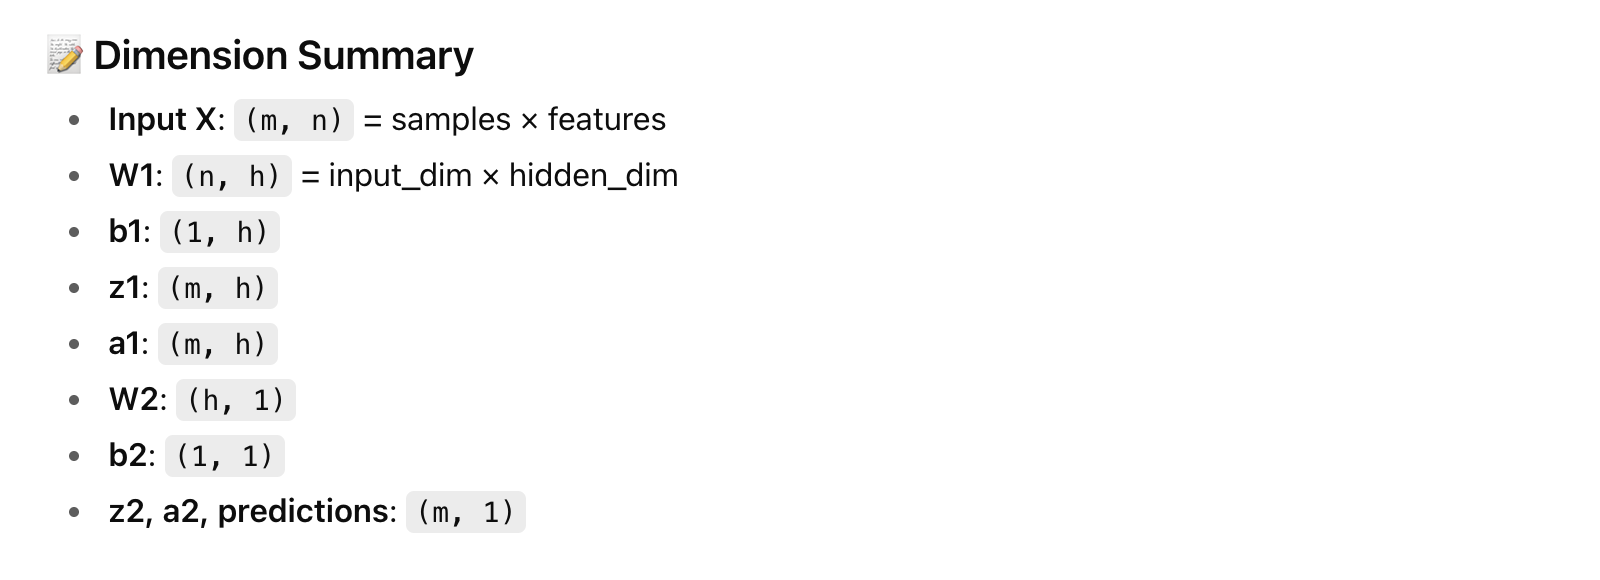

In [13]:
import numpy as np

class TwoLayerNN_Binary:
        def __init__(self,input_dim,hidden_dim,learning_rate=0.01,epochs=100,threshold=0.5):
            self.learning_rate = learning_rate
            self.epochs = epochs
            self.threshold = threshold

            # Initializing parameters
            self.w1 = np.random.randn(input_dim,hidden_dim) * 0.01
            self.b1 = np.zeros((1,hidden_dim))
            self.w2 = np.random.randn(hidden_dim,1)
            self.b2 = np.zeros((1,1))

        def relu(self,z):
            return np.maximum(z,0)  

        def sigmoid(self,z):
            return 1/(1 + np.exp(-z))
        
        def calculate_loss(self,y_pred,y_true):
            eps = 1e-9
            return -np.mean(y_true * np.log(y_pred+eps) + (1-y_true)*np.log(1-y_pred+eps))
        
        def relu_grad(self,z):
            return (z > 0).astype(int)

        def fit(self,X,Y):
            Y = Y.reshape(-1,1)
            m = Y.shape[0]

            for epoch in range(self.epochs):
                # Forward Pass
                z1 = X @ self.w1 + self.b1    # (m,h)
                a1 = self.relu(z1)
                z2 = a1 @ self.w2 + self.b2
                a2 = self.sigmoid(z2)

                # Loss
                loss = self.calculate_loss(a2,Y)

                # Backpropogation
                dz2 = (a2 - Y) / m
                dw2 = a1.T @ dz2
                db2 = np.sum(dz2,axis=0,keepdims=True)

                da1 = dz2 @ self.w2.T
                dz1 = da1 * self.relu_grad(z1)
                dw1 = X.T @ dz1
                db1 = np.sum(dz1,axis=0,keepdims=True)

                # Updating the parameters
                self.w2 -= self.learning_rate * dw2
                self.b2 -= self.learning_rate * db2
                self.w1 -= self.learning_rate * dw1
                self.b1 -= self.learning_rate * db1

            return self
        
        def predict(self,X):
            X = np.asarray(X,dtype=np.float64)

            z1 = X @ self.w1 + self.b1    
            a1 = self.relu(z1)
            z2 = a1 @ self.w2 + self.b2
            a2 = self.sigmoid(z2)

            return (a2 >= self.threshold).astype(int)
        
        def score(self,X,Y):
            preds = self.predict(X)
            return np.mean(preds == Y)

In [14]:
# Fake binary dataset
np.random.seed(42)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # simple linear boundary

model = TwoLayerNN_Binary(input_dim=2, hidden_dim=5, threshold=0.5, learning_rate=0.1, epochs=1000)
model.fit(X, y)

# probs = model.predict_proba(X[:5])
preds = model.predict(X[:5])

# print("Predicted probabilities:\n", probs.ravel())
print("Predicted labels:", preds.ravel())

Predicted labels: [1 1 0 1 1]
